In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


sns.set_theme(context="notebook", style="whitegrid", palette="Set2", color_codes=True, font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,8)

In [21]:
# dt = pd.read_csv("/content/drive/MyDrive/Facultad/Inferencia_Estadistica/datasets/smoke_detection_iot.csv", index_col=0)
dt = pd.read_csv("../smoke_detection_iot.csv", index_col=0)
dt.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [22]:
data = dt.drop(["UTC", "CNT", "Fire Alarm"], axis=1)

# Analisis Exploratorio

Text(0, 0.5, 'Densidad')

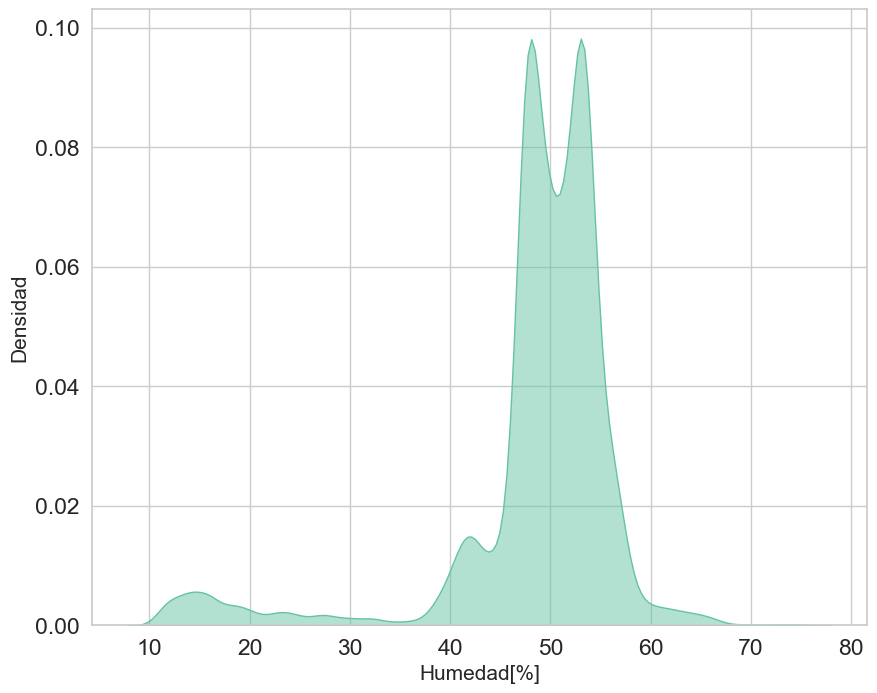

In [23]:
sns.kdeplot(data=data, x="Humidity[%]", fill=True, alpha=0.5)
plt.xlabel("Humedad[%]", fontsize=15)
plt.ylabel("Densidad", fontsize=15)

Text(0, 0.5, 'Densidad')

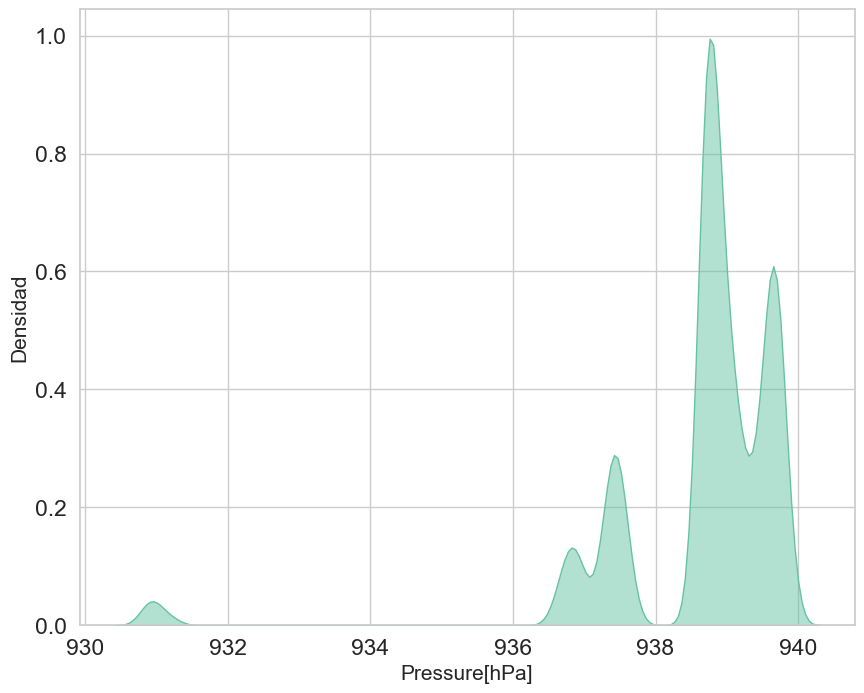

In [24]:
sns.kdeplot(data=data, x="Pressure[hPa]", fill=True, alpha=0.5)
plt.xlabel("Pressure[hPa]", fontsize=15)
plt.ylabel("Densidad", fontsize=15)

Text(0.5, 1.0, 'Análisis por componentes principales')

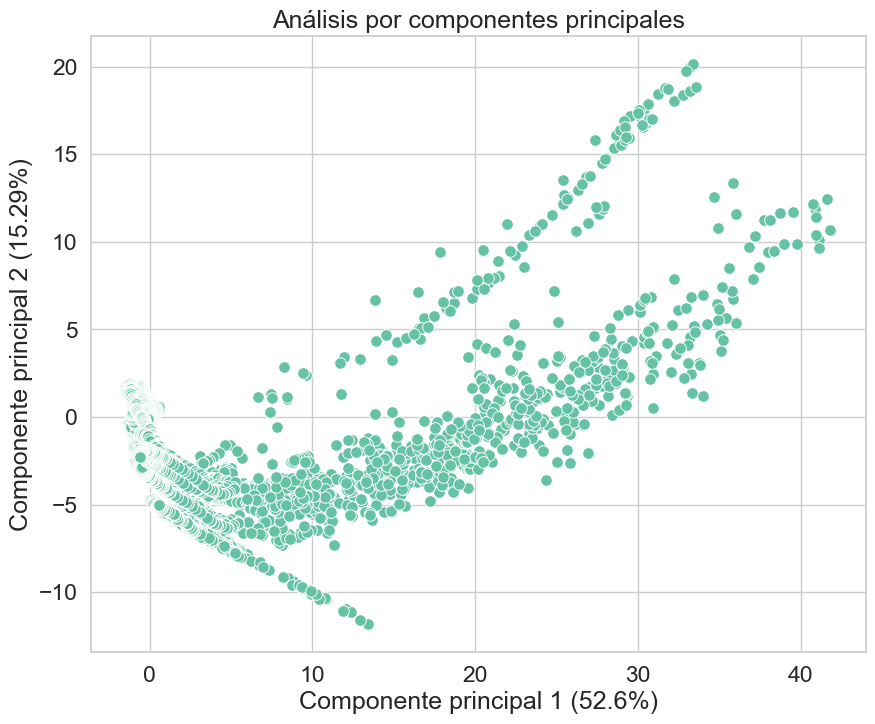

In [25]:
data_scl = StandardScaler().fit_transform(data)
pca = PCA()
data_pca = pca.fit_transform(data_scl)
pc1 = round(100*pca.explained_variance_ratio_[0],2)
pc2 = round(100*pca.explained_variance_ratio_[1],2)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], s=70)
plt.xlabel("Componente principal 1 ({}%)".format(pc1))
plt.ylabel("Componente principal 2 ({}%)".format(pc2))
plt.title("Análisis por componentes principales")

In [26]:
sil_scores = []
inertia = []
for i in range(2,11):
  kms = KMeans(n_clusters=i, random_state=242).fit(data_scl)
  sil = silhouette_score(data_scl, labels=kms.labels_)
  sil_scores.append(sil)
  inertia.append(kms.inertia_)

C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

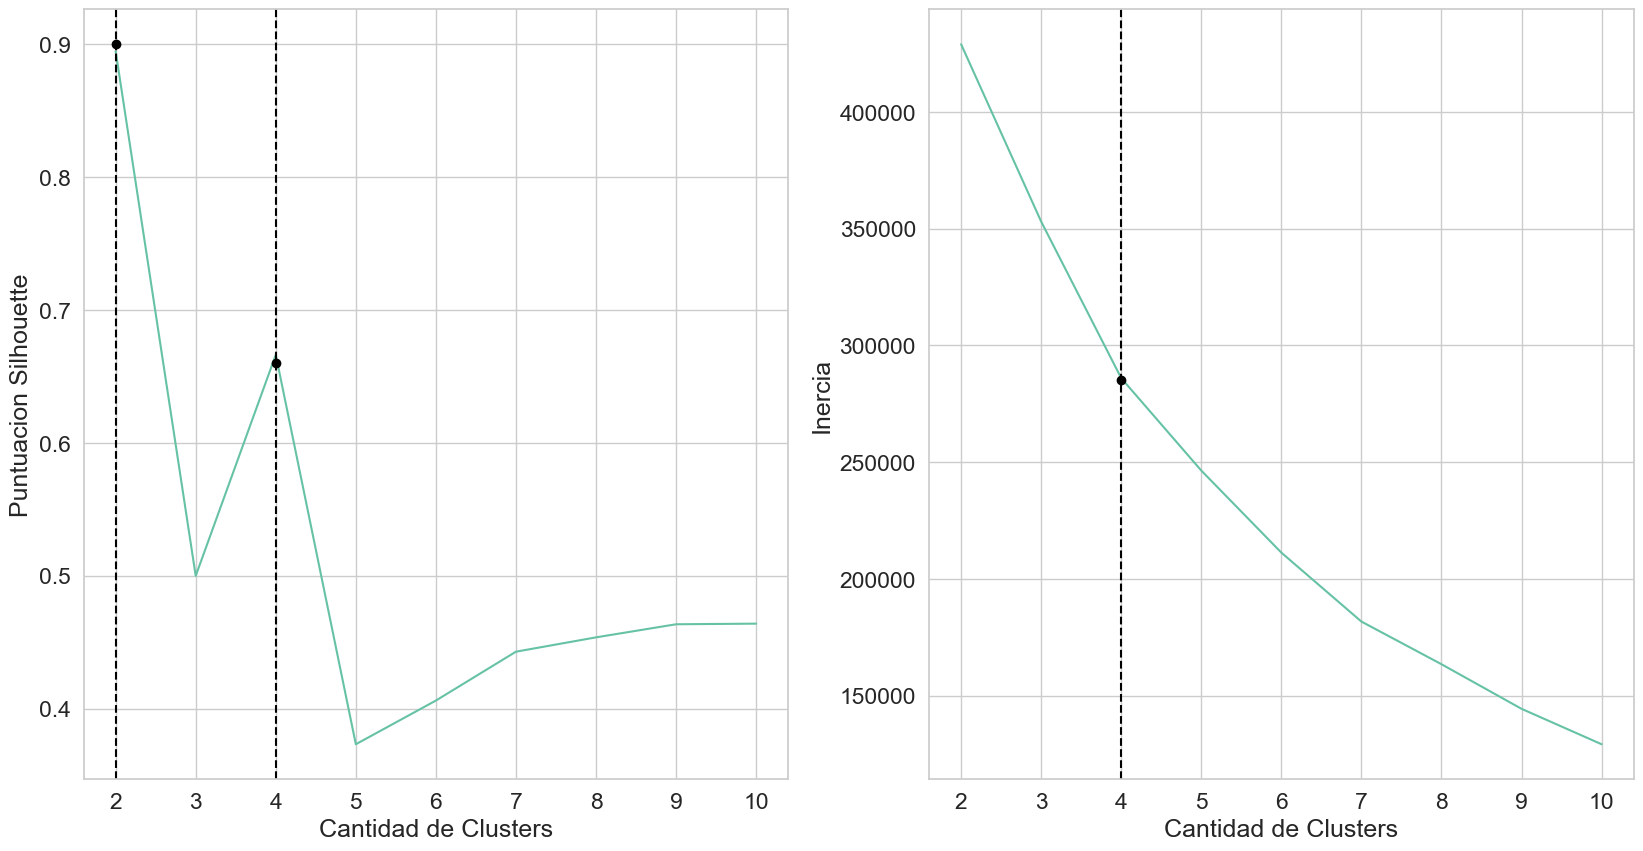

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

sns.lineplot(x=range(2,11), y=sil_scores, ax=ax[0])
ax[0].set_xticks(range(2,11))
ax[0].set_xlabel("Cantidad de Clusters")
ax[0].set_ylabel("Puntuacion Silhouette")
ax[0].plot(2, 0.9, marker="o", color="black")
ax[0].axvline(2, ls="--", color="black")
ax[0].plot(4, 0.66, marker="o", color="black")
ax[0].axvline(4, ls="--", color="black")


sns.lineplot(x=range(2,11), y=inertia, ax=ax[1])
ax[1].set_xticks(range(2,11))
ax[1].set_xlabel("Cantidad de Clusters")
ax[1].set_ylabel("Inercia")
ax[1].plot(4, 285000, marker="o", color="black")
ax[1].axvline(4, ls="--", color="black")



# KMeans

In [28]:
labels = []
centros = []
y_kms = []
for i in [2, 4]:
  km = KMeans(n_clusters=i, random_state=242).fit(data_scl)
  y_km = pd.Series(km.predict(data_scl))
  centroides = km.cluster_centers_
  centroides_pca = pca.transform(centroides)
  
  centros.append(centroides_pca)
  labels.append(km.labels_)
  y_kms.append(y_km)

C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
data_kmeans = data.copy()
data_kmeans["Clusters_KM1"] = y_kms[0]
data_kmeans["Clusters_KM2"] = y_kms[1]

In [30]:
data_kmeans.groupby(["Clusters_KM1"]).mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Clusters_KM2
Clusters_KM1,,,,,,,,,,,,,
0,15.921466,48.762300,1456.198345,535.832064,12957.683277,19784.762986,938.657703,13.161756,15.092184,87.025600,15.821406,1.695111,0.167952
1,20.697492,27.027103,48853.956386,13626.573209,11471.992212,16808.855140,935.725819,8542.602259,16538.445701,39541.780109,18333.153224,7645.475045,1.588785


In [31]:
data_kmeans.groupby(["Clusters_KM2"]).mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Clusters_KM1
Clusters_KM2,,,,,,,,,,,,,
0,15.110191,50.545704,718.349975,443.187020,12961.953891,19796.199634,938.874221,1.639119,1.705476,11.275494,1.762196,0.042160,0.000000
1,20.883192,33.858797,38433.751880,13171.695489,11737.808271,17289.815789,934.783090,11242.086541,26614.800489,39850.896015,29927.133977,14769.475654,1.000000
2,21.124228,22.098978,55574.452012,11876.235294,11398.845201,16726.690402,936.335741,4576.482492,6240.162957,27766.061842,6688.207924,1552.765486,0.578947
3,29.833888,19.298891,10190.080523,1486.967791,12996.626861,19803.124886,935.010743,78.289289,104.189730,481.421501,111.352766,24.078158,0.000608


Text(0.5, 1.0, 'Análisis por componentes principales')

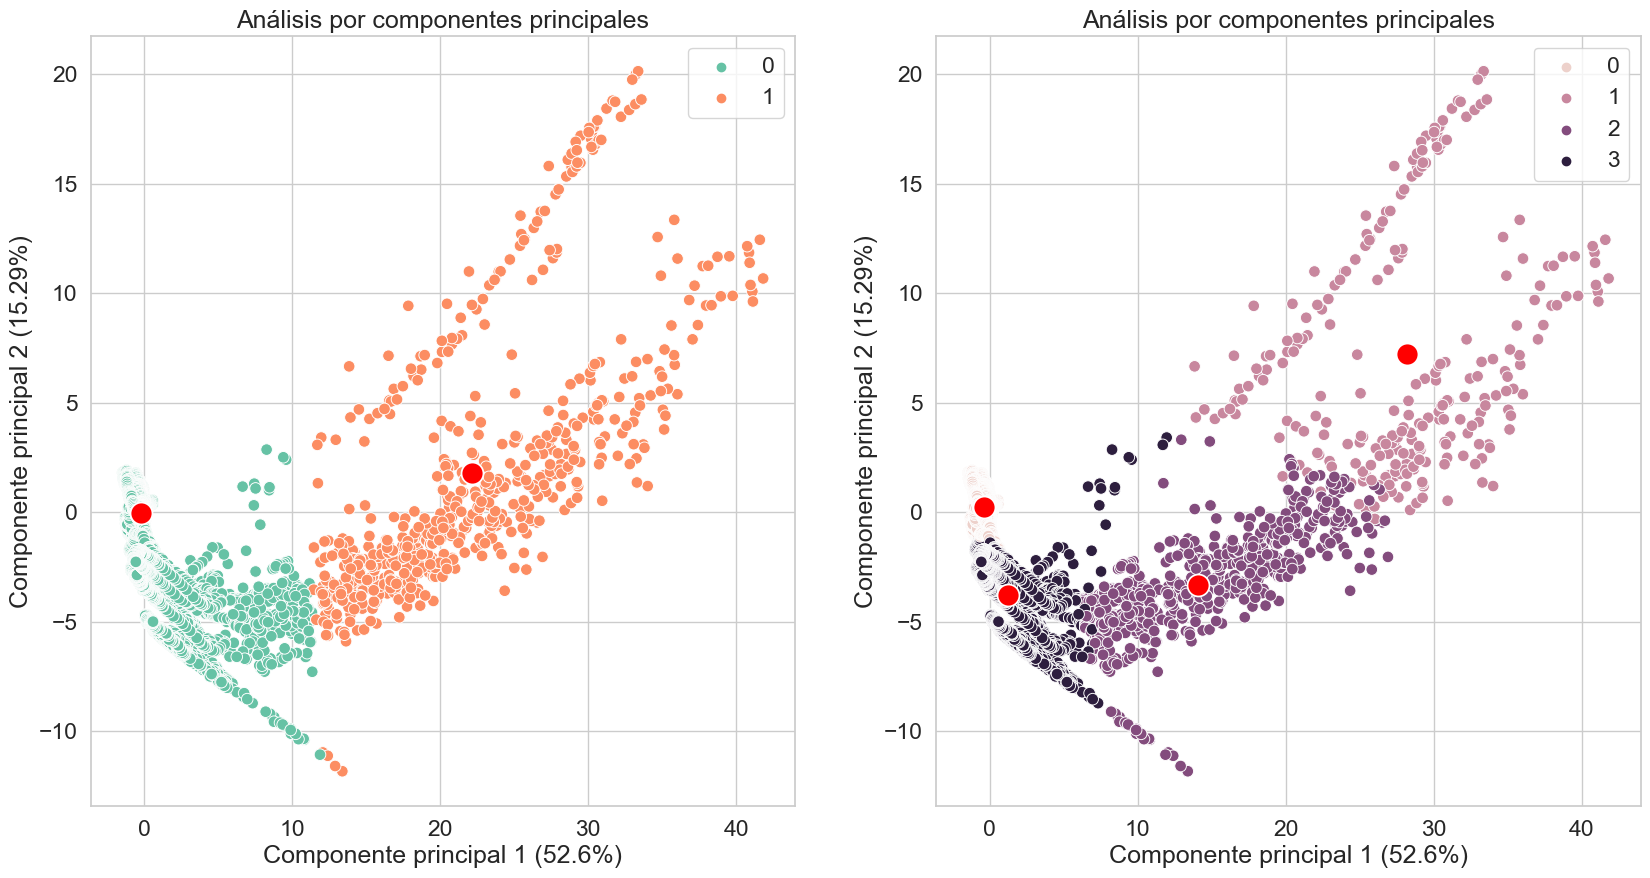

In [32]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels[0], s=70, ax=ax[0])
sns.scatterplot(x=centros[0][:,0], y=centros[0][:,1], color="red", s=250, ax=ax[0])
ax[0].set_xlabel("Componente principal 1 ({}%)".format(pc1))
ax[0].set_ylabel("Componente principal 2 ({}%)".format(pc2))
ax[0].set_title("Análisis por componentes principales")

sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels[1], s=70, ax=ax[1])
sns.scatterplot(x=centros[1][:,0], y=centros[1][:,1], color="red", s=250, ax=ax[1])
ax[1].set_xlabel("Componente principal 1 ({}%)".format(pc1))
ax[1].set_ylabel("Componente principal 2 ({}%)".format(pc2))
ax[1].set_title("Análisis por componentes principales")

# Agglomerative Clustering

In [33]:
km = KMeans(n_clusters=2000, random_state=242).fit(data_scl)
centroides = km.cluster_centers_
centroides_pca = pca.transform(centroides)

C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
pol_agrup = ['ward', 'complete', 'average', 'single']
clusters = 2
labels = []
y_aggs = []
for agrupamiento in pol_agrup:
  agglo = AgglomerativeClustering(n_clusters=clusters, linkage=agrupamiento)

  agglo.fit(centroides)
  labels.append(agglo.labels_)
  y_agg = pd.Series(agglo.labels_)
  y_aggs.append(y_agg)


In [35]:
data_agg = data.copy()
data_agg["Clusters_simple"] = y_aggs[3]

In [36]:
data_agg.groupby(["Clusters_simple"]).mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Clusters_simple,,,,,,,,,,,,
0.0,25.171237,52.752883,18.832833,401.33984,12937.363363,19878.277277,939.73562,0.371897,0.422948,2.472928,0.442878,0.04446
1.0,23.240500,53.740000,3.500000,400.50000,12639.500000,19700.000000,939.80150,0.045000,0.065000,0.275000,0.069500,0.01700


Text(0.5, 1.0, 'Politica de Agrupamiento: Simple')

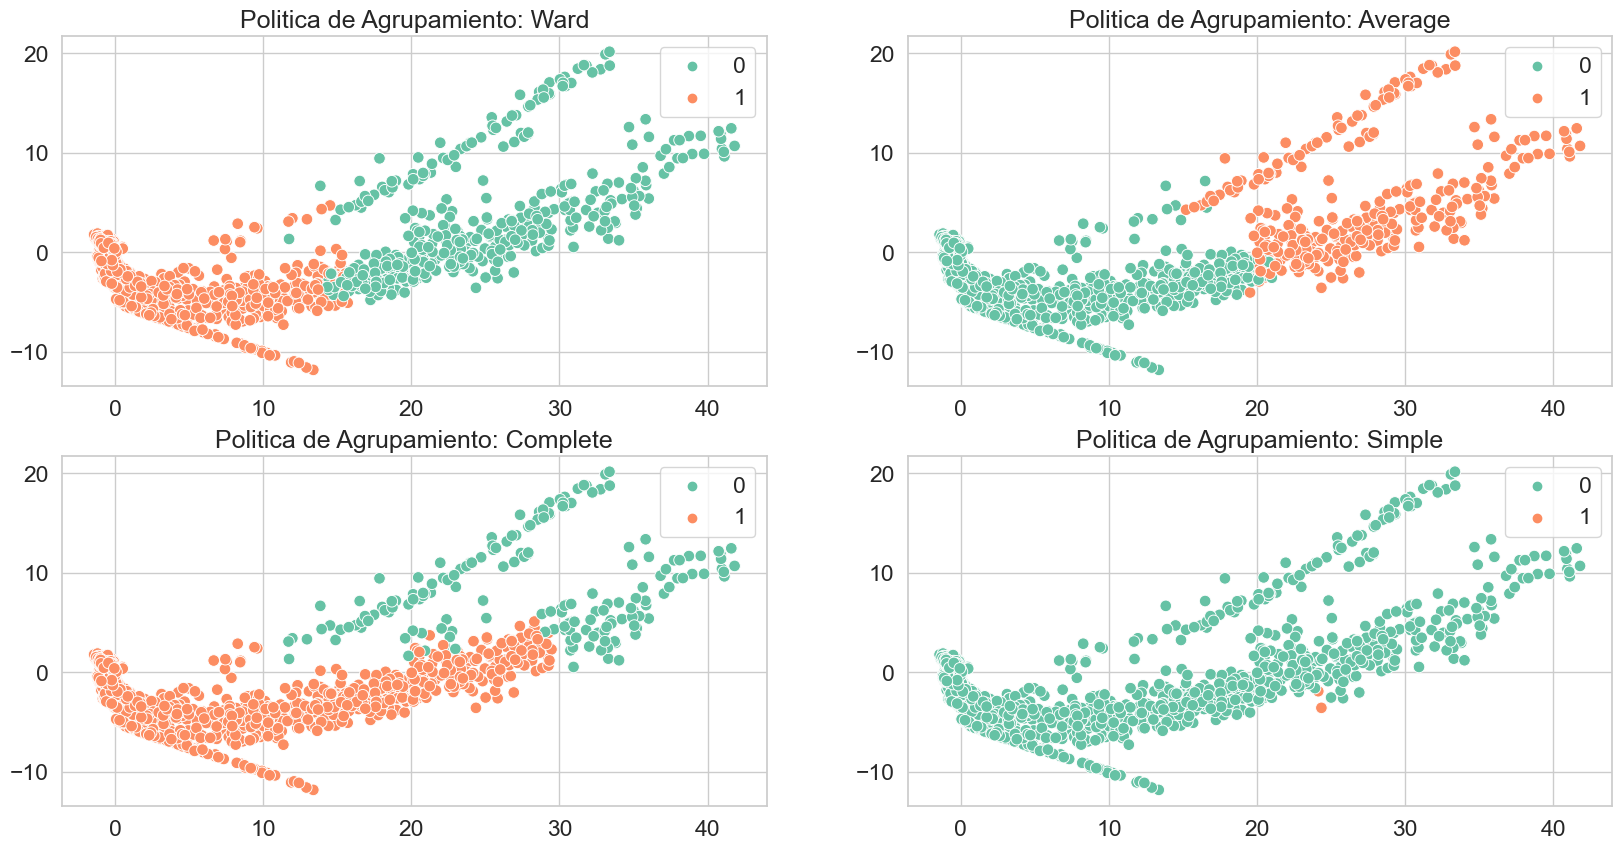

In [37]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[0], s=70, ax=ax[0,0])
#sns.scatterplot(x=centros[0][:,0], y=centros[0][:,1], color="red", s=250, ax=ax[0,0])
ax[0,0].set_title("Politica de Agrupamiento: Ward")

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[1], s=70, ax=ax[1,0])
#sns.scatterplot(x=centros[1][:,0], y=centros[1][:,1], color="red", s=250, ax=ax[1,0])
ax[1,0].set_title("Politica de Agrupamiento: Complete")

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[2], s=70, ax=ax[0,1])
#sns.scatterplot(x=centros[1][:,0], y=centros[1][:,1], color="red", s=250, ax=ax[0,1])
ax[0,1].set_title("Politica de Agrupamiento: Average")

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[3], s=70, ax=ax[1,1])
#sns.scatterplot(x=centros[1][:,0], y=centros[1][:,1], color="red", s=250, ax=ax[1,1])
ax[1,1].set_title("Politica de Agrupamiento: Simple")

Text(0.5, 1.0, 'Politica de Agrupamiento: Simple')

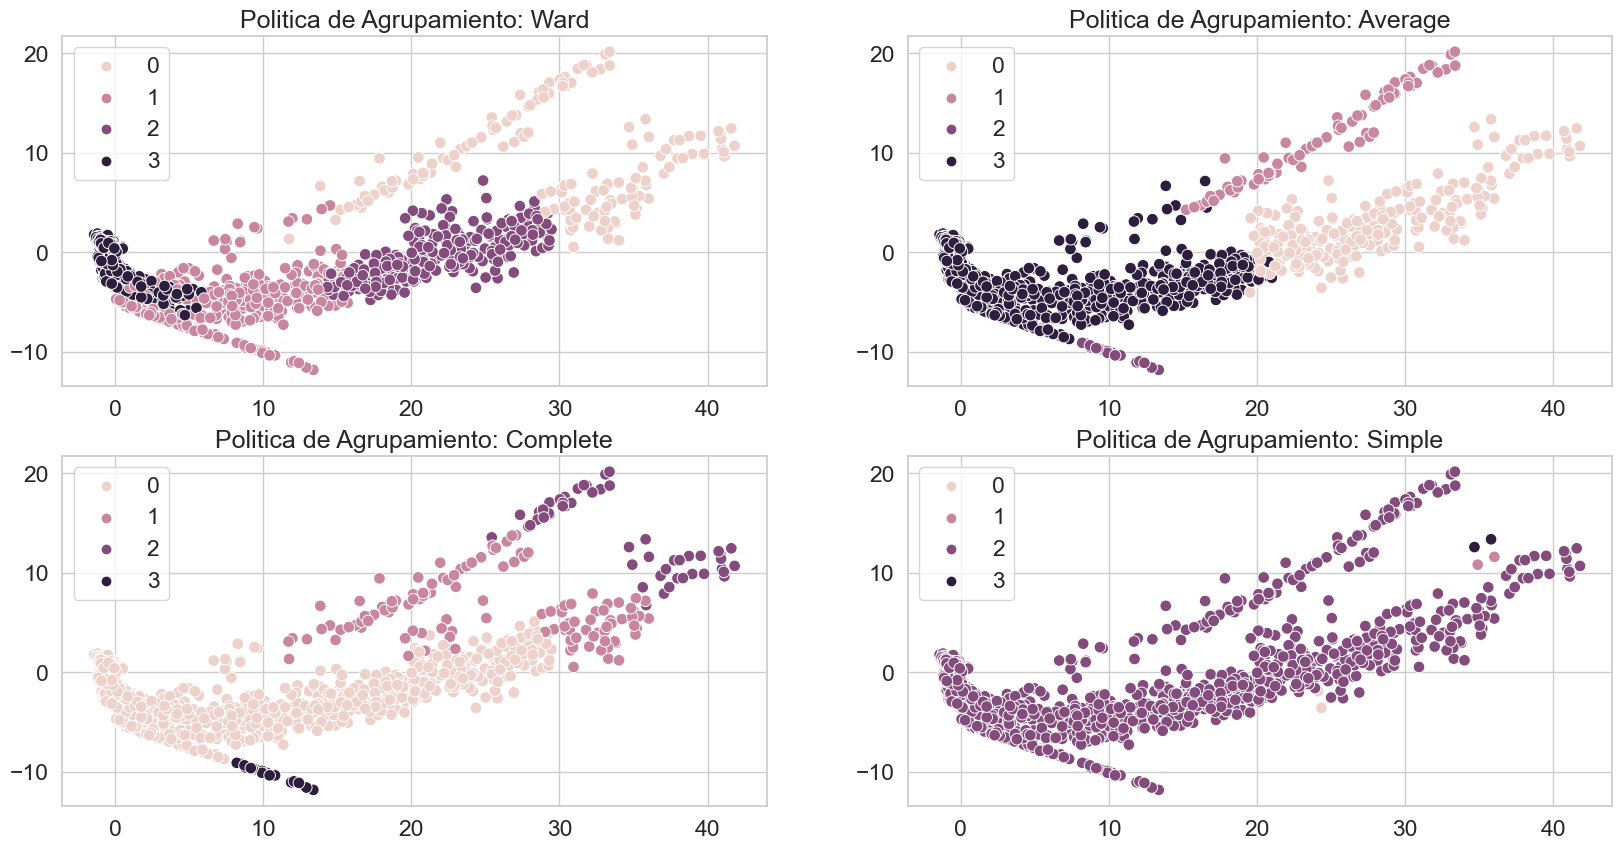

In [38]:
pol_agrup = ['ward', 'complete', 'average', 'single']
clusters = 4
labels = []
y_aggs = []
for agrupamiento in pol_agrup:
  agglo = AgglomerativeClustering(n_clusters=clusters, linkage=agrupamiento)

  agglo.fit(centroides)
  labels.append(agglo.labels_)
  y_agg = pd.Series(agglo.labels_)
  y_aggs.append(y_agg)


fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[0], s=70, ax=ax[0,0])
#sns.scatterplot(x=centros[0][:,0], y=centros[0][:,1], color="red", s=250, ax=ax[0,0])
ax[0,0].set_title("Politica de Agrupamiento: Ward")

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[1], s=70, ax=ax[1,0])
#sns.scatterplot(x=centros[1][:,0], y=centros[1][:,1], color="red", s=250, ax=ax[1,0])
ax[1,0].set_title("Politica de Agrupamiento: Complete")

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[2], s=70, ax=ax[0,1])
#sns.scatterplot(x=centros[1][:,0], y=centros[1][:,1], color="red", s=250, ax=ax[0,1])
ax[0,1].set_title("Politica de Agrupamiento: Average")

sns.scatterplot(x=centroides_pca[:,0], y=centroides_pca[:,1], hue=labels[3], s=70, ax=ax[1,1])
#sns.scatterplot(x=centros[1][:,0], y=centros[1][:,1], color="red", s=250, ax=ax[1,1])
ax[1,1].set_title("Politica de Agrupamiento: Simple")

In [39]:
data_agg["Clusters_average"] = y_aggs[3]
data_agg.groupby(["Clusters_average"]).mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Clusters_simple
Clusters_average,,,,,,,,,,,,,
0.0,23.240500,53.740000,3.500000,400.500000,12639.500000,19700.000000,939.801500,0.045000,0.06500,0.275000,0.06950,0.017000,1.0
1.0,24.755000,51.965000,0.000000,400.000000,12813.500000,19817.000000,939.777500,0.075000,0.08000,0.515000,0.08050,0.002000,0.0
2.0,25.172816,52.753842,18.850552,401.337011,12937.649448,19878.441825,939.735562,0.372332,0.42326,2.476279,0.44318,0.044337,0.0
3.0,24.013500,52.585000,20.000000,405.500000,12776.000000,19775.500000,939.751500,0.235000,0.45500,1.090000,0.50450,0.210500,0.0


# DBACAN

In [40]:
epsilon = 4
cant_min_puntos = 3
db = DBSCAN(eps=epsilon, min_samples=cant_min_puntos)

clases = db.fit_predict(centroides)
y_dbs = pd.Series(clases)


In [41]:
data_dbscan = data.copy()
data_dbscan["Clusters_DBSCAN"] = y_dbs
data_dbscan.groupby(["Clusters_DBSCAN"]).mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Clusters_DBSCAN,,,,,,,,,,,,
-1.0,23.802375,52.026250,12.250000,401.500000,12713.250000,19744.875000,939.784750,0.111250,0.191250,0.58500,0.208500,0.074375
0.0,25.181524,52.732447,18.845154,401.266548,12940.809693,19880.962766,939.734577,0.375089,0.424184,2.49958,0.443849,0.042510
1.0,25.136850,52.894100,18.836667,401.743333,12921.916667,19865.500000,939.740630,0.358667,0.419767,2.35830,0.441160,0.054480


<Axes: >

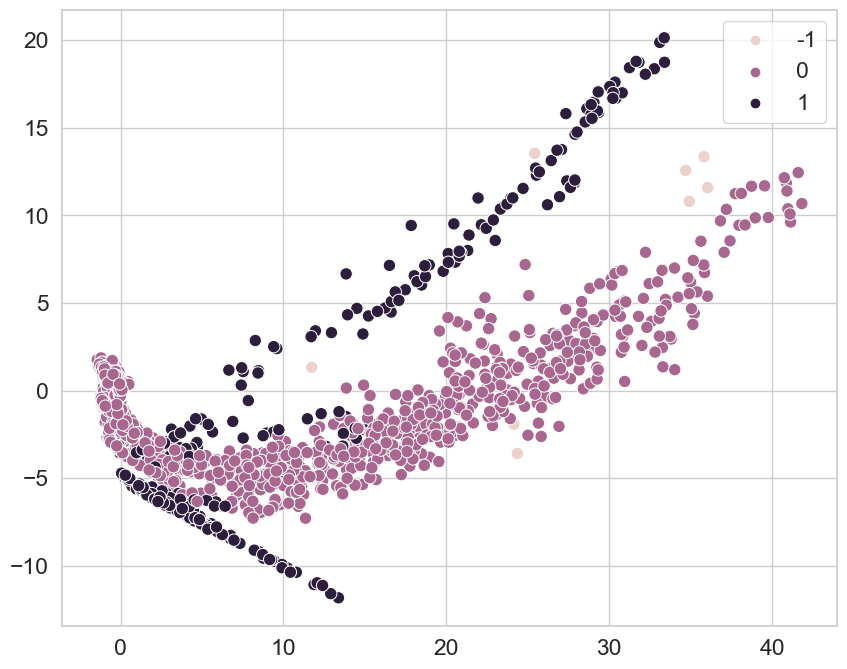

In [42]:
sns.scatterplot(
    x=centroides_pca[:,0],
    y=centroides_pca[:,1],
    hue=clases,
    s=80
)